1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as la

Eigenvalues:
 [2.77267240e+01 1.58016534e-15 2.03994837e+00] 

Eigenvectors:
 [[-0.10676677 -0.81649658  0.56739245]
 [-0.58814422 -0.40824829 -0.6981545 ]
 [-0.80167776  0.40824829  0.43663039]] 

Compare Eigenvalues: True
Compare Eigenvectors: True 

By selecting the component 0 and 2, we retain 100.00% of the total variability
the new V:
 [[-0.10676677  0.56739245]
 [-0.58814422 -0.6981545 ]
 [-0.80167776  0.43663039]]


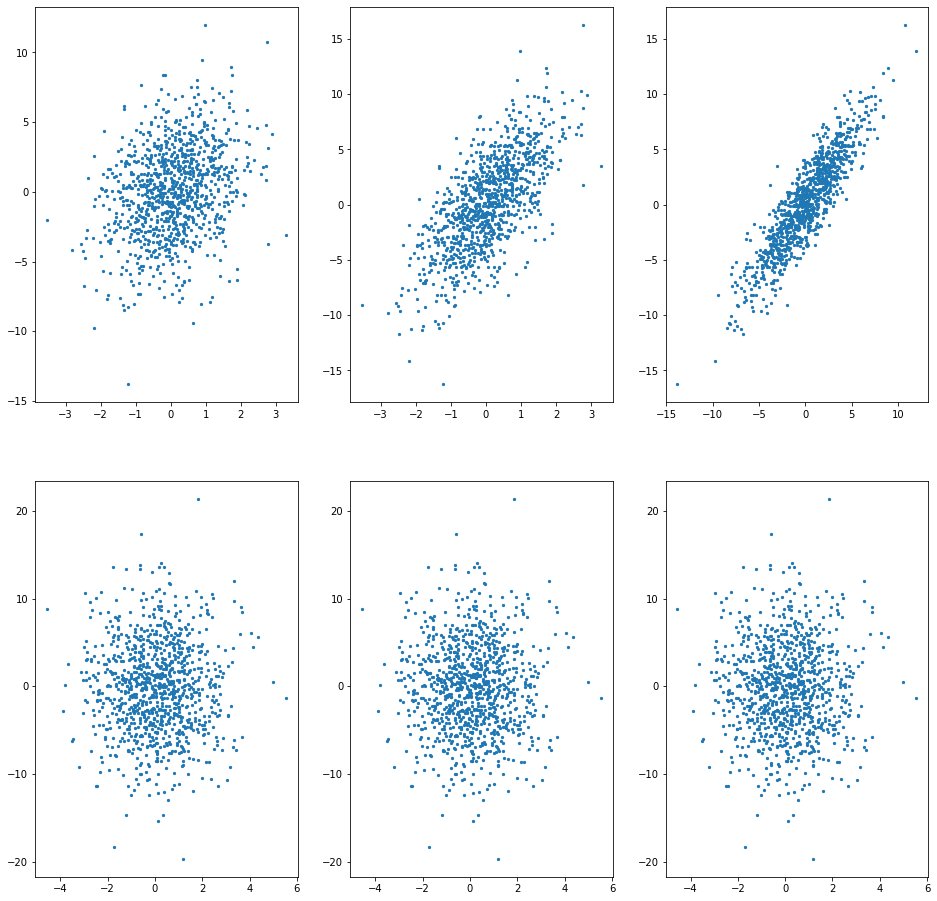

In [85]:
#Generate a dataset simulating 3 features
N = 1000
x1 = np.random.normal(0,1,size=N)
x2 = x1 + np.random.normal(0,3,size=N)
x3 = 2 * x1 + x2
A = np.row_stack((x1,x2,x3))

#Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cov = np.cov(A)
l, V = la.eig(cov)
l = np.real_if_close(l)
print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

#Find the eigenvectors and eigenvalues using the SVD
U, S, Vt = la.svd(cov)
S[[1,2]] = S[[2,1]]
l_svd = S
U[:,[1,2]] = U[:,[2,1]]
V_svd = U
print('Compare Eigenvalues:',np.allclose(l,l_svd))
print('Compare Eigenvectors:',np.allclose(V,V_svd),'\n')

#What percent of the total dataset's variability is explained by the principal components? 
#Given how the dataset was constructed, do these make sense? Reduce the dimensionality of 
#the system so that at least 99% of the total variability is retained
print("By selecting the component 0 and 2, we retain %.2f%% of the total variability" % ((np.sum([l[0],l[2]])/np.sum(l))*100))
new_V = V[:,[0,2]]
print('the new V:\n',new_V)

#Redefine the data according to the new basis from the PCA
New_matrix = np.dot(new_V.T,A)

#Plot the data, in both the original and the new basis. The figure should have 2 rows 
#(the original and the new basis) and 3 columns (the  [𝑥0,𝑥1] ,  [𝑥0,𝑥2]  and  [𝑥1,𝑥2]  
#projections) of scatter plots.

fig, axes = plt.subplots(2,3,figsize=(16, 16))
axes[0,0].scatter(A[0,:],A[1,:], s=5)
axes[0,1].scatter(A[0,:],A[2,:], s=5)
axes[0,2].scatter(A[1,:],A[2,:], s=5)
axes[1,0].scatter(New_matrix[1,:],New_matrix[0,:], s=5)
axes[1,1].scatter(New_matrix[1,:],New_matrix[0,:], s=5)
axes[1,2].scatter(New_matrix[1,:],New_matrix[0,:], s=5)

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Eigenvalues:
 [2.77267240e+01 1.58016534e-15 2.03994837e+00] 

Eigenvectors:
 [[-0.10676677 -0.81649658  0.56739245]
 [-0.58814422 -0.40824829 -0.6981545 ]
 [-0.80167776  0.40824829  0.43663039]] 

By selecting the component 0 and 2, we retain 100.00% of the total variability
the new V:
 [[-0.10676677  0.56739245]
 [-0.58814422 -0.6981545 ]
 [-0.80167776  0.43663039]]


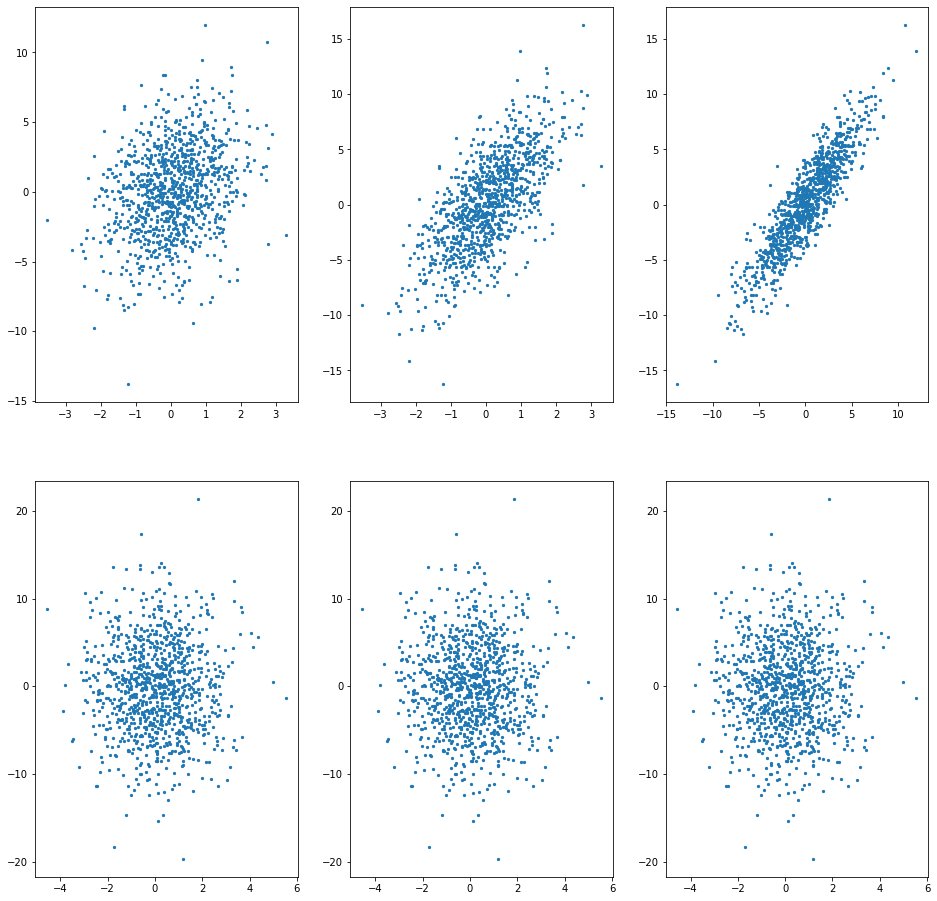

In [87]:
noise = 0
for i in range(10):
    noise += np.random.normal(size=(N,3),scale=(1/20))
new_A = A + noise.T
cov = np.cov(A)
l, V = la.eig(cov)
l = np.real_if_close(l)
print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')
print("By selecting the component 0 and 2, we retain %.2f%% of the total variability" % ((np.sum([l[0],l[2]])/np.sum(l))*100))
new_V = V[:,[0,2]]
print('the new V:\n',new_V)
New_matrix = np.dot(new_V.T,A)
fig, axes = plt.subplots(2,3,figsize=(16, 16))
axes[0,0].scatter(A[0,:],A[1,:], s=5)
axes[0,1].scatter(A[0,:],A[2,:], s=5)
axes[0,2].scatter(A[1,:],A[2,:], s=5)
axes[1,0].scatter(New_matrix[1,:],New_matrix[0,:], s=5)
axes[1,1].scatter(New_matrix[1,:],New_matrix[0,:], s=5)
axes[1,2].scatter(New_matrix[1,:],New_matrix[0,:], s=5)

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [116]:
data= pd.read_csv('data/magic04.data', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [124]:
df = data[range(0,10)]
cov_matrix = df.cov()
l, V = la.eig(cov_matrix)
l = np.real_if_close(l)
print("Eigenvalues:\n", l, '\n')
for i in range(1,10):
    print("By selecting ",i+1," elements, we retain %.2f%% of the total variability" % ((np.sum(l[0:i])/np.sum(l))*100))
print('\n\nTo retain more than 99% of the total variability we can select the first 7 elements')

Eigenvalues:
 [6.57979140e+03 3.85387048e+03 2.01638313e+03 1.32675968e+03
 6.10187259e+02 4.33599171e+02 1.17330074e+02 8.63965822e-02
 1.07363851e-02 3.85322859e-04] 

By selecting  2  elements, we retain 44.05% of the total variability
By selecting  3  elements, we retain 69.85% of the total variability
By selecting  4  elements, we retain 83.34% of the total variability
By selecting  5  elements, we retain 92.23% of the total variability
By selecting  6  elements, we retain 96.31% of the total variability
By selecting  7  elements, we retain 99.21% of the total variability
By selecting  8  elements, we retain 100.00% of the total variability
By selecting  9  elements, we retain 100.00% of the total variability
By selecting  10  elements, we retain 100.00% of the total variability


To retain more than 99% of the total variability we can select the first 7 elements
